In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_images[0,23,23]

194

In [5]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

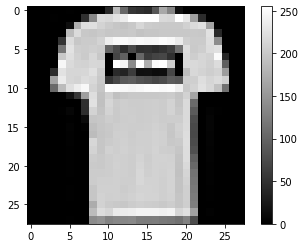

In [7]:
plt.figure()
plt.imshow(train_images[1], cmap=plt.get_cmap('gray'))
plt.colorbar()
plt.show()

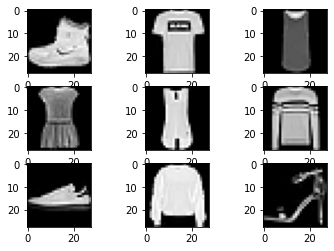

In [8]:
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(train_images[i], cmap=plt.get_cmap('gray'))
plt.show()

# Data Preprocessing

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()

In [11]:
train_images = scaler.fit_transform(train_images.reshape(-1, train_images.shape[-1])).reshape(train_images.shape)
test_images = scaler.fit_transform(test_images.reshape(-1, test_images.shape[-1])).reshape(test_images.shape)
# OR
#train_images = train_images / 255.0
#test_images = test_images / 255.0

train_images

array([[[-0.16750469, -0.23685982, -0.28435516, ..., -0.46849186,
         -0.3830438 , -0.24016711],
        [-0.16750469, -0.23685982, -0.28435516, ..., -0.46849186,
         -0.3830438 , -0.24016711],
        [-0.16750469, -0.23685982, -0.28435516, ..., -0.46849186,
         -0.3830438 , -0.24016711],
        ...,
        [-0.16750469, -0.23685982, -0.28435516, ..., -0.46849186,
         -0.3830438 , -0.24016711],
        [-0.16750469, -0.23685982, -0.28435516, ..., -0.46849186,
         -0.3830438 , -0.24016711],
        [-0.16750469, -0.23685982, -0.28435516, ..., -0.46849186,
         -0.3830438 , -0.24016711]],

       [[-0.16750469, -0.23685982, -0.28435516, ..., -0.46849186,
         -0.3830438 , -0.24016711],
        [-0.16750469, -0.23685982, -0.28435516, ..., -0.46849186,
         -0.3830438 , -0.24016711],
        [-0.16750469, -0.23685982, -0.28435516, ..., -0.46849186,
         -0.3830438 , -0.24016711],
        ...,
        [-0.16750469, -0.23685982, -0.28435516, ..., -

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])

In [13]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)

In [14]:
model.fit(train_images, train_labels, epochs=1)

1875/1875 [==============================] - 2s 1ms/step - loss: 0.4413 - accuracy: 0.8409


In [15]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 837us/step - loss: 0.3952 - accuracy: 0.8590
Test accuracy: 0.859000027179718


In [16]:
predictions = model.predict(test_images)

In [17]:
np.argmax(predictions[1])

2

Guess  : Coat
Actual : Coat


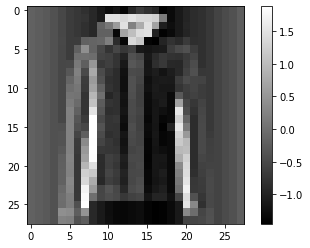

In [18]:
print("Guess  :",class_names[np.argmax(predictions[6])])
print("Actual :",class_names[test_labels[6]])

plt.figure()
plt.imshow(test_images[6], cmap=plt.get_cmap('gray'))
plt.colorbar()
plt.show()

Guess  : Sandal
Actual : Sandal


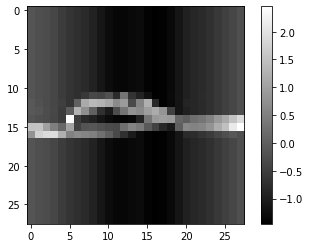

In [19]:
print("Guess  :",class_names[np.argmax(predictions[8])])
print("Actual :",class_names[test_labels[8]])

plt.figure()
plt.imshow(test_images[8], cmap=plt.get_cmap('gray'))
plt.colorbar()
plt.show()

Guess  : Pullover
Actual : Coat


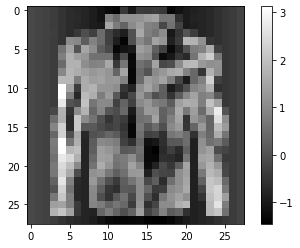

In [27]:
print("Guess  :",class_names[np.argmax(predictions[17])])
print("Actual :",class_names[test_labels[17]])

plt.figure()
plt.imshow(test_images[17], cmap=plt.get_cmap('gray'))
plt.colorbar()
plt.show()